In [ ]:


import pandas as pd
import numpy as np

import random
import itertools
from sklearn import metrics
from tqdm.auto import tqdm

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import sys
import os

import math

from utils import number_split, create_mix
from data_process import load_wls_adress_AddDomain
from process_SHAC import load_process_SHAC
from custom_distance import KL



from sklearn.feature_extraction.text import CountVectorizer

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

import pickle


In [ ]:
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F


In [11]:
import pandas as pd
import numpy as np
import pickle
import math
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [12]:
import sys
import os


sys.path.append("../src")
from custom_distance import KL

In [13]:
# save

# with open("../output/regressionSHAC/05_02_400_L2_C5_V1.pkl", "wb") as f:
#     pickle.dump(df_eval, file=f)
    
# with open(f"../output/regressionInverseSHAC_MIMIC_UW/binaryUnigram_02_05_500_l2_C1_V100.pkl", "rb") as f:
# with open(f"../output/regressionSHAC/binaryUnigram_05_02_500_l2_C1_V1.pkl", "rb") as f:

# fname="../output/regressionSHAC/binaryUnigram_0.3_0.3_500_l2_C1_V10"
# fname="../output/regressionSHAC/Sentence-BERT_05_02_500_l2_C1_V10"
fname="../output/regressionSHAC/LLaMaAverage_0.5_0.2_500_l2_C1_V10"

with open(f"{fname}.pkl", "rb") as f:
    df_eval = pickle.load(file=f)

# Plot results

In [14]:
df_eval

,auprc_logistic_confounder,auprc_logistic_vanilla,auprc_logistic_confounder_df0,auprc_logistic_confounder_df1,precision_confounder,recall_confounder,f1_confounder,precision_confounder_df0,recall_confounder_df0,f1_confounder_df0,...,n_test,n_z0_pos_train,n_z0_neg_train,n_z0_pos_test,n_z0_neg_test,n_z1_pos_train,n_z1_neg_train,n_z1_pos_test,n_z1_neg_test,run
0,0.952392,0.958524,0.969989,0.818398,0.925134,0.843902,0.882653,0.953488,0.841026,0.893733,...,500,700,700,195,155,120,480,10,140,0
1,0.951707,0.958163,0.969340,0.822533,0.925926,0.853659,0.888325,0.953757,0.850515,0.899183,...,500,700,700,194,156,120,480,11,139,0
2,0.951455,0.958401,0.969079,0.829770,0.925926,0.853659,0.888325,0.953488,0.849741,0.898630,...,500,700,700,193,157,120,480,12,138,0
3,0.951455,0.958401,0.969079,0.829770,0.925926,0.853659,0.888325,0.953488,0.849741,0.898630,...,500,700,700,193,157,120,480,12,138,0
4,0.951448,0.958468,0.969771,0.826814,0.920635,0.848780,0.883249,0.952941,0.843750,0.895028,...,500,700,700,192,158,120,480,13,137,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,0.923678,0.907341,0.847917,0.947389,0.876623,0.843750,0.859873,0.781250,0.862069,0.819672,...,500,400,400,29,171,240,960,131,169,4
6421,0.923678,0.907341,0.847917,0.947389,0.876623,0.843750,0.859873,0.781250,0.862069,0.819672,...,500,400,400,29,171,240,960,131,169,4
6422,0.923678,0.907341,0.847917,0.947389,0.876623,0.843750,0.859873,0.781250,0.862069,0.819672,...,500,400,400,29,171,240,960,131,169,4
6423,0.923678,0.907341,0.847917,0.947389,0.876623,0.843750,0.859873,0.781250,0.862069,0.819672,...,500,400,400,29,171,240,960,131,169,4


In [15]:
df_eval['alpha_test'].unique()

array([0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.

In [16]:
df_eval['p_pos_train_z0'].unique()

array([0.5])

In [17]:
df_eval['p_pos_train_z1'].unique()

array([0.2])

In [18]:
# df = df_eval.query("(p_pos_train_z0 == 0.3) & (p_pos_train_z1 == 0.6)")
df = df_eval.copy()

In [19]:
df['alpha_train'].unique()

array([0.4])

In [20]:
df['p_mix_z1'].unique()

array([0.3, 0.5, 0.6])

In [21]:
len(df['p_mix_z1'].unique())

3

In [14]:
# df['distance_KL_Test_Train'] = df.apply(lambda x: KL([1-x['p_pos_test_z0'], x['p_pos_test_z0'], 1-x['p_pos_test_z1'], x['p_pos_test_z1']],
#                                                            [1-x['p_pos_train_z0'], x['p_pos_train_z0'], 1-x['p_pos_train_z1'], x['p_pos_train_z1']]
#                                                           ),
#                                               axis=1
#                                              )

In [28]:
# Questionable?
# df['distance_KL_Train_Test'] = df.apply(lambda x: KL([1-x['p_pos_train_z0'], x['p_pos_train_z0'], 1-x['p_pos_train_z1'], x['p_pos_train_z1']],
#                                                      [1-x['p_pos_test_z0'], x['p_pos_test_z0'], 1-x['p_pos_test_z1'], x['p_pos_test_z1']],
                                                           
#                                                           ),
#                                               axis=1
#                                              )

# df['distance_KL_Test_Train'] = df.apply(lambda x: KL(
#                                                      [1-x['p_pos_test_z0'], x['p_pos_test_z0'], 1-x['p_pos_test_z1'], x['p_pos_test_z1']],
#                                                      [1-x['p_pos_train_z0'], x['p_pos_train_z0'], 1-x['p_pos_train_z1'], x['p_pos_train_z1']],
                                                           
#                                                           ),
#                                               axis=1
#                                              )




In [22]:
df['distance_KL_Train_Test'] = df.apply(lambda x: KL(
    [(1-x['p_pos_train_z0'])*x['p_mix_z0'], x['p_pos_train_z0']*x['p_mix_z0'], (1-x['p_pos_train_z1'])*x['p_mix_z1'], x['p_pos_train_z1']*x['p_mix_z1']],
    [(1-x['p_pos_test_z0'])*x['p_mix_z0'], x['p_pos_test_z0']*x['p_mix_z0'], (1-x['p_pos_test_z1'])*x['p_mix_z1'], x['p_pos_test_z1']*x['p_mix_z1']],
                                                   ),
                                              axis=1
                                             )







df['distance_EMD'] = df.apply(lambda x: scipy.stats.wasserstein_distance(np.arange(4), np.arange(4),
                                                     [(1-x['p_pos_test_z0'])*x['p_mix_z0'], x['p_pos_test_z0']*x['p_mix_z0'], (1-x['p_pos_test_z1'])*x['p_mix_z1'], x['p_pos_test_z1']*x['p_mix_z1']],
                                                     [(1-x['p_pos_train_z0'])*x['p_mix_z0'], x['p_pos_train_z0']*x['p_mix_z0'], (1-x['p_pos_train_z1'])*x['p_mix_z1'], x['p_pos_train_z1']*x['p_mix_z1']],
                                                   ),
                                              axis=1
                                             )

## Distance Plots

In [23]:
df

,auprc_logistic_confounder,auprc_logistic_vanilla,auprc_logistic_confounder_df0,auprc_logistic_confounder_df1,precision_confounder,recall_confounder,f1_confounder,precision_confounder_df0,recall_confounder_df0,f1_confounder_df0,...,n_z0_neg_train,n_z0_pos_test,n_z0_neg_test,n_z1_pos_train,n_z1_neg_train,n_z1_pos_test,n_z1_neg_test,run,distance_KL_Train_Test,distance_EMD
0,0.952392,0.958524,0.969989,0.818398,0.925134,0.843902,0.882653,0.953488,0.841026,0.893733,...,700,195,155,120,480,10,140,0,0.033393,0.079891
1,0.951707,0.958163,0.969340,0.822533,0.925926,0.853659,0.888325,0.953757,0.850515,0.899183,...,700,194,156,120,480,11,139,0,0.029837,0.076725
2,0.951455,0.958401,0.969079,0.829770,0.925926,0.853659,0.888325,0.953488,0.849741,0.898630,...,700,193,157,120,480,12,138,0,0.026650,0.073585
3,0.951455,0.958401,0.969079,0.829770,0.925926,0.853659,0.888325,0.953488,0.849741,0.898630,...,700,193,157,120,480,12,138,0,0.023783,0.070470
4,0.951448,0.958468,0.969771,0.826814,0.920635,0.848780,0.883249,0.952941,0.843750,0.895028,...,700,192,158,120,480,13,137,0,0.021196,0.067380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,0.923678,0.907341,0.847917,0.947389,0.876623,0.843750,0.859873,0.781250,0.862069,0.819672,...,400,29,171,240,960,131,169,4,0.216043,0.284581
6421,0.923678,0.907341,0.847917,0.947389,0.876623,0.843750,0.859873,0.781250,0.862069,0.819672,...,400,29,171,240,960,131,169,4,0.216642,0.284892
6422,0.923678,0.907341,0.847917,0.947389,0.876623,0.843750,0.859873,0.781250,0.862069,0.819672,...,400,29,171,240,960,131,169,4,0.217240,0.285202
6423,0.923678,0.907341,0.847917,0.947389,0.876623,0.843750,0.859873,0.781250,0.862069,0.819672,...,400,29,171,240,960,131,169,4,0.217836,0.285510


In [24]:
df['p_mix_z1'].unique()

array([0.3, 0.5, 0.6])

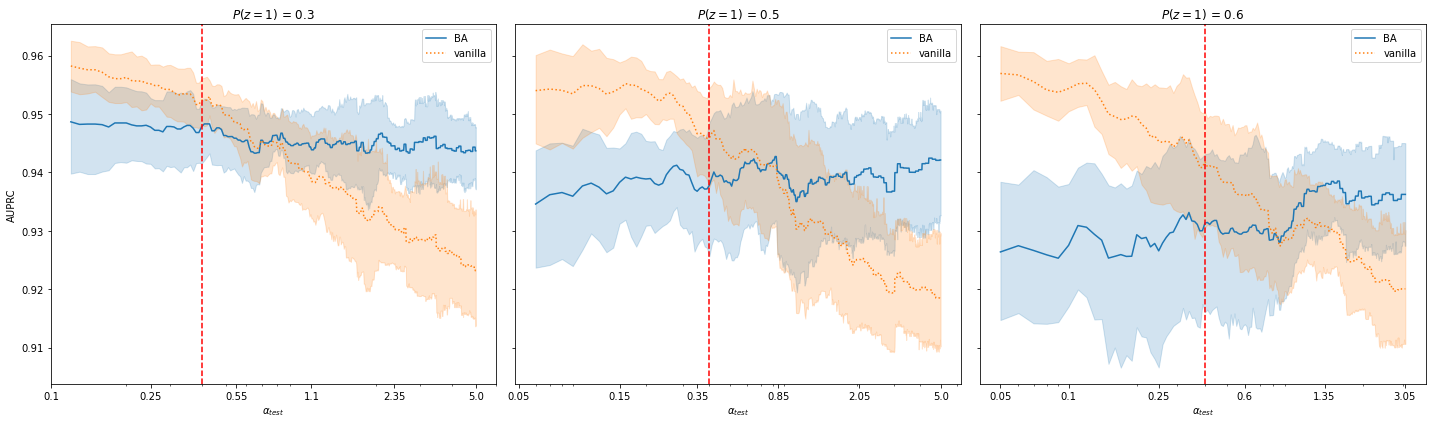

In [31]:
# better version for save
xlabel = "alpha_test"

p_mix_z1 = df['p_mix_z1'].unique()
# p_mix_z1 = [0.2,0.3,0.5,]

fig, ax = plt.subplots(math.ceil(len(p_mix_z1)/3),3, figsize=(20,6), sharey=True)
ax = ax.ravel()
for idx, k in enumerate(p_mix_z1):
    _df = df[df['p_mix_z1'] == k].sort_values(xlabel)
    
    g_results=sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder', ax=ax[idx], label="BA")
    g_results=sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla', ax=ax[idx], label="vanilla", linestyle='dotted')
    g_results.set(xscale="log")
    
    ax[idx].axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
    ax[idx].set_title(f"$P(z=1)$ = {round(k,3)}")
    ax[idx].legend()
    ax[idx].set(xlabel=r"$\alpha_{test}$", ylabel="AUPRC")
    sample_count = np.around(np.around(np.logspace(math.log10(min(_df[xlabel])),math.log10(max(_df[xlabel])),6)/0.05,decimals=0)*0.05, decimals=2)
    g_results.set(xticks=sample_count)
    g_results.set(xticklabels=sample_count)

plt.tight_layout()


In [ ]:
# better version for save
xlabel = "alpha_test"

p_mix_z1 = df['p_mix_z1'].unique()
# p_mix_z1 = [0.2,0.3,0.5,]

fig, ax = plt.subplots(1, 1, figsize=(20,10), sharey=True)

_df = df.sort_values(xlabel)

g_results=sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder', ax=ax, label="BA")
g_results=sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla', ax=ax, label="vanilla", linestyle='dotted')
g_results.set(xscale="log")

ax.axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
ax.set_title(f"$P(z=1)$ = {round(k,3)}")
ax.legend()
ax.set(xlabel=r"$\alpha_{test}$", ylabel="AUPRC")
sample_count = np.around(np.around(np.logspace(math.log10(min(_df[xlabel])),math.log10(max(_df[xlabel])),6)/0.05,decimals=0)*0.05, decimals=2)
g_results.set(xticks=sample_count)
g_results.set(xticklabels=sample_count)

plt.tight_layout()


In [ ]:
fname

In [ ]:
######  Saving
# better version for save
xlabel = "alpha_test"

p_mix_z1 = df['p_mix_z1'].unique()[1:-1]
# p_mix_z1 = df['p_mix_z1'].unique()[1:4]
p_mix_z1 = [0.3,0.5,0.6]

fig, ax = plt.subplots(math.ceil(len(p_mix_z1)/3),3, figsize=(15,4))
ax = ax.ravel()
for idx, k in enumerate(p_mix_z1):
    _df = df[df['p_mix_z1'].round(2) == k].sort_values(xlabel)
    
    g_results=sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder', ax=ax[idx], label="BA")
    g_results=sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla', ax=ax[idx], label="vanilla", linestyle='dotted')
    # g_results.set(xscale="log")
    
    ax[idx].axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
    ax[idx].set_title(f"$P(z=1)$ = {round(k,3)}")
    ax[idx].legend()
    ax[idx].set(xlabel=r"$\alpha_{test}$", ylabel="AUPRC")


plt.tight_layout()

plt.savefig(f"{fname}.png", dpi=400)
plt.close()

In [ ]:
######  Saving
# better version for save
xlabel = "alpha_test"

p_mix_z1 = df['p_mix_z1'].unique()[1:-1]
# p_mix_z1 = df['p_mix_z1'].unique()[1:4]
p_mix_z1 = [0.3,0.5,0.6]

fig, ax = plt.subplots(math.ceil(len(p_mix_z1)/3),3, figsize=(15,4), sharey=True)
ax = ax.ravel()
for idx, k in enumerate(p_mix_z1):
    _df = df[df['p_mix_z1'].round(2) == k].sort_values(xlabel)
    
    g_results=sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder', ax=ax[idx], label="BA")
    g_results=sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla', ax=ax[idx], label="vanilla", linestyle='dotted')
    g_results.set(xscale="log")
    
    ax[idx].axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
    ax[idx].set_title(f"$P(z=1)$ = {round(k,3)}")
    ax[idx].legend()
    ax[idx].set(xlabel=r"$\alpha_{test}$", ylabel="AUPRC")
    sample_count = np.around(np.around(np.logspace(math.log10(min(_df[xlabel])),math.log10(max(_df[xlabel])),6)/0.05,decimals=0)*0.05, decimals=2)
    g_results.set(xticks=sample_count)
    g_results.set(xticklabels=sample_count)

plt.tight_layout()

plt.savefig(f"{fname}_logScale.png", dpi=400)
plt.close()

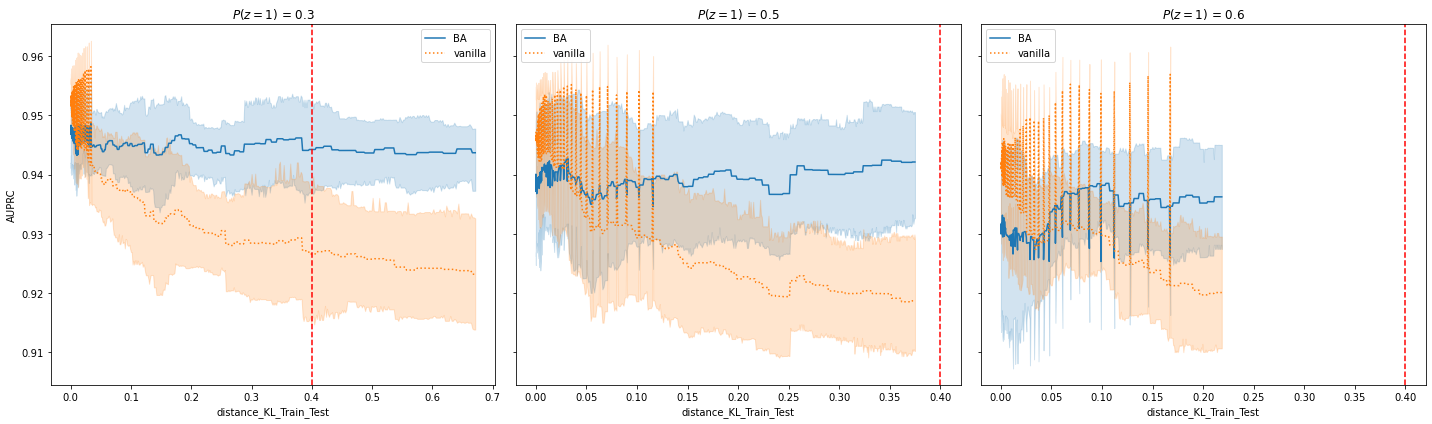

In [33]:
# better version for save
# xlabel = "alpha_test"
# xlabel = "distance_EMD"
xlabel = "distance_KL_Train_Test"

p_mix_z1 = df['p_mix_z1'].unique()
# p_mix_z1 = [0.2,0.3,0.5,]

fig, ax = plt.subplots(math.ceil(len(p_mix_z1)/3),3, figsize=(20,6), sharey=True)
ax = ax.ravel()
for idx, k in enumerate(p_mix_z1):
    _df = df[df['p_mix_z1'] == k].sort_values(xlabel)
    
    g_results=sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder', ax=ax[idx], label="BA")
    g_results=sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla', ax=ax[idx], label="vanilla", linestyle='dotted')
    # g_results.set(xscale="log")
    
    ax[idx].axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
    ax[idx].set_title(f"$P(z=1)$ = {round(k,3)}")
    ax[idx].legend()
    ax[idx].set(xlabel=f"{xlabel}", ylabel="AUPRC")
    # sample_count = np.around(np.around(np.logspace(math.log10(min(_df[xlabel])),math.log10(max(_df[xlabel])),6)/0.05,decimals=0)*0.05, decimals=2)
    # g_results.set(xticks=sample_count)
    # g_results.set(xticklabels=sample_count)

plt.tight_layout()


In [ ]:
xlabel = "alpha_test"

p_mix_z1 = df['p_mix_z1'].unique()

fig, ax = plt.subplots(math.ceil(len(p_mix_z1)/3),3, figsize=(20,20))
ax = ax.ravel()
for idx, k in enumerate(p_mix_z1):
    _df = df[df['p_mix_z1'] == k].sort_values("alpha_test")
    
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder_df0', ax=ax[idx], label="confounder-df0", alpha=0.6)
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder_df1', ax=ax[idx], label="confounder-df1", alpha=0.6)
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla_df0', ax=ax[idx], label="vanilla-df0", alpha=0.6,linestyle='dashed')
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla_df1', ax=ax[idx], label="vanilla-df1", alpha=0.6,linestyle='dashed')
    # ax[idx].plot(_df['alpha_test'], _df['auprc_logistic_confounder'], label="confounder")
    # ax[idx].plot(_df['alpha_test'], _df['auprc_logistic_vanilla'], label="vanilla")
    
    ax[idx].axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
    ax[idx].set_title(f"p_mix_z1 = {round(k,3)}")
    ax[idx].legend()
plt.tight_layout()

In [ ]:
xlabel = "distance_EMD"

p_mix_z1 = df['p_mix_z1'].unique()

fig, ax = plt.subplots(math.ceil(len(p_mix_z1)/3),3, figsize=(20,20))
ax = ax.ravel()
for idx, k in enumerate(p_mix_z1):
    _df = df[df['p_mix_z1'] == k].sort_values(xlabel)
    
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder_df0', ax=ax[idx], label="confounder-df0", alpha=0.6)
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder_df1', ax=ax[idx], label="confounder-df1", alpha=0.6)
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla_df0', ax=ax[idx], label="vanilla-df0", alpha=0.6,linestyle='dashed')
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla_df1', ax=ax[idx], label="vanilla-df1", alpha=0.6,linestyle='dashed')
    # ax[idx].plot(_df['alpha_test'], _df['auprc_logistic_confounder'], label="confounder")
    # ax[idx].plot(_df['alpha_test'], _df['auprc_logistic_vanilla'], label="vanilla")
    
    ax[idx].axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
    ax[idx].set_title(f"p_mix_z1 = {round(k,3)}")
    ax[idx].legend()
plt.tight_layout()

In [ ]:
xlabel = "distance_EMD"

p_mix_z1 = df['p_mix_z1'].unique()

fig, ax = plt.subplots(math.ceil(len(p_mix_z1)/3),3, figsize=(20,10), sharey=True)
ax = ax.ravel()
for idx, k in enumerate(p_mix_z1):
    
    _df = df[df['p_mix_z1'] == k].sort_values(xlabel)
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder', ax=ax[idx], label="confounder")
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla', ax=ax[idx], label="vanilla")
    
    ax[idx].set_xlabel(xlabel)
    ax[idx].set_ylabel("AUPRC")
    # ax[idx].axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
    ax[idx].set_title(f"p_mix_z1 = {round(k,3)}")
    ax[idx].legend()

plt.tight_layout()

In [ ]:
xlabel = "distance_KL_Train_Test"

p_mix_z1 = df['p_mix_z1'].unique()

fig, ax = plt.subplots(math.ceil(len(p_mix_z1)/3),3, figsize=(20,10))
ax = ax.ravel()
for idx, k in enumerate(p_mix_z1):
    
    _df = df[df['p_mix_z1'] == k].sort_values(xlabel)
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder', ax=ax[idx], label="confounder")
    sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla', ax=ax[idx], label="vanilla")
    
    ax[idx].set_xlabel(xlabel)
    ax[idx].set_ylabel("AUPRC")
    # ax[idx].axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
    ax[idx].set_title(f"p_mix_z1 = {round(k,3)}")
    ax[idx].legend()

plt.tight_layout()

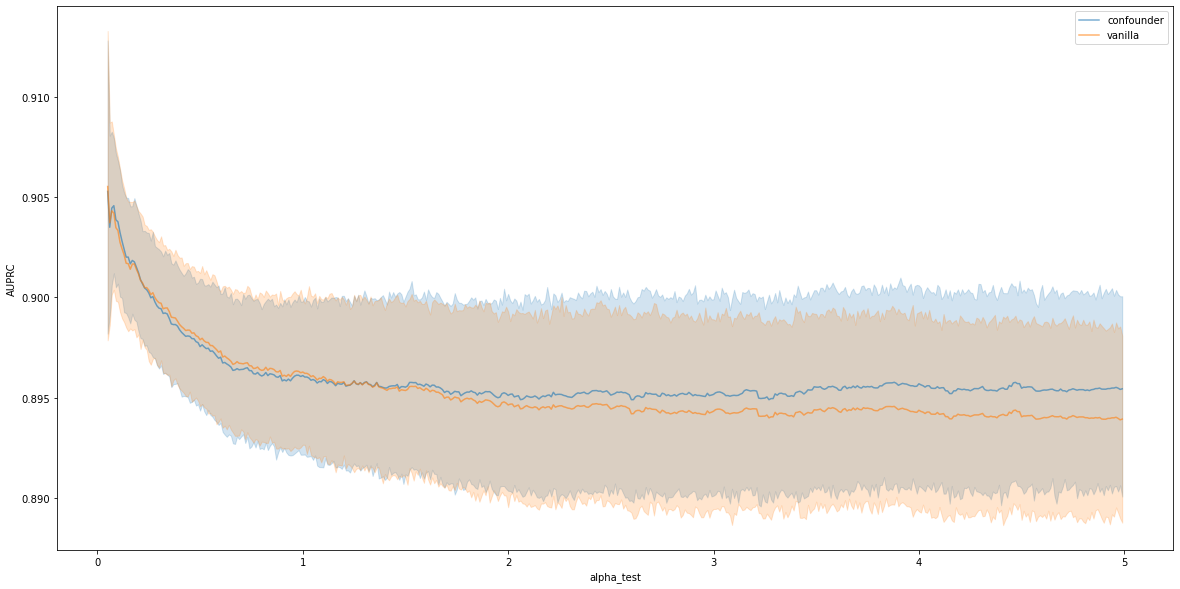

In [81]:
# xlabel = "distance_KL_Train_Test"
xlabel="alpha_test"

p_mix_z1 = df['p_mix_z1'].unique()

fig, ax = plt.subplots(1,1, figsize=(20,10))


_df = df.sort_values(xlabel)

sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder', label="confounder", alpha=0.6)
sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla', label="vanilla", alpha=0.6)

# ax.plot(_df[xlabel], _df['auprc_logistic_confounder'], label="confounder", alpha=0.6)
# ax.plot(_df[xlabel], _df['auprc_logistic_vanilla'], label="vanilla", alpha=0.6)

ax.set_xlabel(xlabel)
ax.set_ylabel("AUPRC")
# ax[idx].axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
ax.legend()


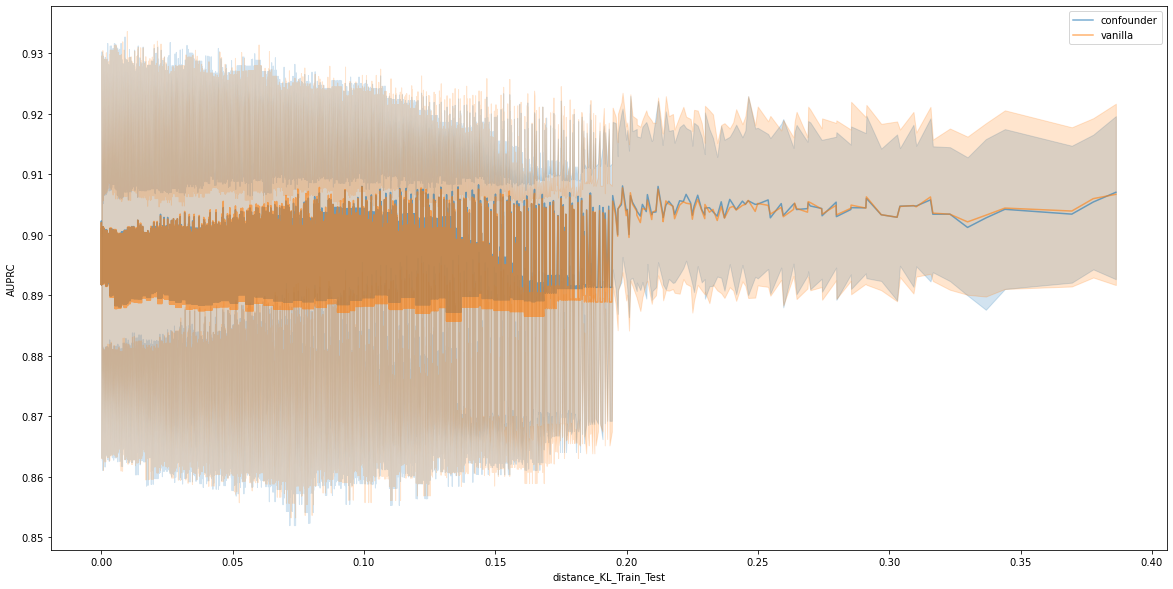

In [82]:
xlabel = "distance_KL_Train_Test"
# xlabel="alpha_test"

p_mix_z1 = df['p_mix_z1'].unique()

fig, ax = plt.subplots(1,1, figsize=(20,10))


_df = df.sort_values(xlabel)

sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_confounder', label="confounder", alpha=0.6)
sns.lineplot(data=_df, x=xlabel, y='auprc_logistic_vanilla', label="vanilla", alpha=0.6)

# ax.plot(_df[xlabel], _df['auprc_logistic_confounder'], label="confounder", alpha=0.6)
# ax.plot(_df[xlabel], _df['auprc_logistic_vanilla'], label="vanilla", alpha=0.6)

ax.set_xlabel(xlabel)
ax.set_ylabel("AUPRC")
# ax[idx].axvline(_df['alpha_train'].unique(), color="red", linestyle="--")
ax.legend()


## Scatter Plot

In [ ]:

fig, ax = plt.subplots(1,2, figsize=(28,10))
xlabel = "distance_KL_Test_Train"
_df = df.sort_values(xlabel)

for idx, k in enumerate(["auprc_logistic_vanilla", "auprc_logistic_confounder"]):
    
    im = ax[idx].scatter(_df["p_pos_test_z0"], _df["p_pos_test_z1"], c=_df[k], cmap='Blues')
    im.set_clim(0.8,1)
    ax[idx].set_xlabel("p_pos_test_z0")
    ax[idx].set_ylabel("p_pos_test_z1")
    ax[idx].set_title(k)

    fig.colorbar(im, ax=ax[idx])

In [57]:
pd.options.display.max_columns = None

In [85]:

df[(df['p_pos_test_z0'].round(3)==0.3)
    & (df['p_pos_test_z1'].round(2)==0.3) 
    & (df['run']==0) 
    # & (df['p_mix_z1'].round(3)==0.4)
   ]


,auprc_logistic_confounder,auprc_logistic_vanilla,auprc_logistic_confounder_df0,auprc_logistic_confounder_df1,precision_confounder,recall_confounder,f1_confounder,precision_confounder_df0,recall_confounder_df0,f1_confounder_df0,precision_confounder_df1,recall_confounder_df1,f1_confounder_df1,auprc_logistic_vanilla_df0,auprc_logistic_vanilla_df1,precision_vanilla,recall_vanilla,f1_vanilla,precision_vanilla_df0,recall_vanilla_df0,f1_vanilla_df0,precision_vanilla_df1,recall_vanilla_df1,f1_vanilla_df1,p_pos_train_z0,p_pos_train_z1,p_pos_train,p_pos_test,p_mix_z0,p_mix_z1,alpha_train,alpha_test,p_pos_test_z0,p_pos_test_z1,C_y,C_z,n_train,n_test,n_z0_pos_train,n_z0_neg_train,n_z0_pos_test,n_z0_neg_test,n_z1_pos_train,n_z1_neg_train,n_z1_pos_test,n_z1_neg_test,run,distance_KL_Train_Test,distance_EMD
60,0.867849,0.867755,0.861276,0.906926,0.854701,0.666667,0.749064,0.840000,0.656250,0.736842,0.941176,0.727273,0.820513,0.861253,0.905603,0.854701,0.666667,0.749064,0.840000,0.656250,0.736842,0.941176,0.727273,0.820513,0.3,0.3,0.3,0.3,0.85,0.15,1.0,0.99,0.300451,0.297446,0.3,0.15,2000,500,510,1190,128,297,90,210,22,53,0,2.747741e-06,7.661492e-04
61,0.867849,0.867755,0.861276,0.906926,0.854701,0.666667,0.749064,0.840000,0.656250,0.736842,0.941176,0.727273,0.820513,0.861253,0.905603,0.854701,0.666667,0.749064,0.840000,0.656250,0.736842,0.941176,0.727273,0.820513,0.3,0.3,0.3,0.3,0.85,0.15,1.0,1.00,0.300000,0.300000,0.3,0.15,2000,500,510,1190,128,297,90,210,22,53,0,0.000000e+00,0.000000e+00
62,0.867122,0.867213,0.858849,0.910849,0.848739,0.673333,0.750929,0.831683,0.661417,0.736842,0.944444,0.739130,0.829268,0.858960,0.910849,0.854701,0.666667,0.749064,0.838384,0.653543,0.734513,0.944444,0.739130,0.829268,0.3,0.3,0.3,0.3,0.85,0.15,1.0,1.01,0.299551,0.302546,0.3,0.15,2000,500,510,1190,127,298,90,210,23,52,0,2.716775e-06,7.638542e-04
130,0.863668,0.863723,0.853187,0.921131,0.852174,0.653333,0.739623,0.831579,0.626984,0.714932,0.950000,0.791667,0.863636,0.853107,0.921131,0.852174,0.653333,0.739623,0.831579,0.626984,0.714932,0.950000,0.791667,0.863636,0.3,0.3,0.3,0.3,0.84,0.16,1.0,0.99,0.300481,0.297476,0.3,0.16,2000,500,504,1176,126,294,96,224,24,56,0,2.896800e-06,8.076923e-04
131,0.863668,0.863723,0.853187,0.921131,0.852174,0.653333,0.739623,0.831579,0.626984,0.714932,0.950000,0.791667,0.863636,0.853107,0.921131,0.852174,0.653333,0.739623,0.831579,0.626984,0.714932,0.950000,0.791667,0.863636,0.3,0.3,0.3,0.3,0.84,0.16,1.0,1.00,0.300000,0.300000,0.3,0.16,2000,500,504,1176,126,294,96,224,24,56,0,0.000000e+00,0.000000e+00
132,0.863668,0.863723,0.853187,0.921131,0.852174,0.653333,0.739623,0.831579,0.626984,0.714932,0.950000,0.791667,0.863636,0.853107,0.921131,0.852174,0.653333,0.739623,0.831579,0.626984,0.714932,0.950000,0.791667,0.863636,0.3,0.3,0.3,0.3,0.84,0.16,1.0,1.01,0.299521,0.302516,0.3,0.16,2000,500,504,1176,126,294,96,224,24,56,0,2.863445e-06,8.051118e-04
305,0.867023,0.866938,0.858140,0.915024,0.850877,0.646667,0.734848,0.838710,0.629032,0.718894,0.904762,0.730769,0.808511,0.858113,0.915317,0.850877,0.646667,0.734848,0.838710,0.629032,0.718894,0.904762,0.730769,0.808511,0.3,0.3,0.3,0.3,0.83,0.17,1.0,1.00,0.300000,0.300000,0.3,0.17,2000,500,498,1162,124,291,102,238,26,59,0,0.000000e+00,0.000000e+00
614,0.869627,0.869576,0.857532,0.926861,0.843478,0.646667,0.732075,0.827957,0.626016,0.712963,0.909091,0.740741,0.816327,0.857532,0.926861,0.843478,0.646667,0.732075,0.827957,0.626016,0.712963,0.909091,0.740741,0.816327,0.3,0.3,0.3,0.3,0.82,0.18,1.0,1.00,0.300000,0.300000,0.3,0.18,2000,500,492,1148,123,287,108,252,27,63,0,0.000000e+00,0.000000e+00
1085,0.864535,0.864442,0.857854,0.900793,0.850877,0.646667,0.734848,0.838710,0.639344,0.725581,0.904762,0.678571,0.775510,0.857564,0.900793,0.850877,0.646667,0.734848,0.838710,0.639344,0.725581,0.904762,0.678571,0.775510,0.3,0.3,0.3,0.3,0.81,0.19,1.0,1.00,0.300000,0.300000,0.3,0.19,2000,500,486,1134,122,283,114,266,28,67,0,0.000000e+00,0.000000e+00
1557,0.868348,0.868024,0.858790,0.905731,0.844828,0.65

<AxesSubplot:xlabel='p_pos_test_z0', ylabel='p_pos_test_z1'>

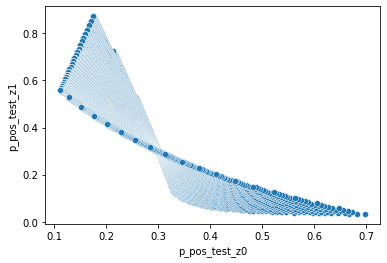

In [80]:
sns.scatterplot(x="p_pos_test_z0", y="p_pos_test_z1", data=df.query("(run==0)"))

In [632]:

auprc_vanilla_target = _df[(_df['p_pos_test_z0'].round(3)==0.5) 
                           & (_df['p_pos_test_z1'].round(2)==0.2) 
                           & (_df['p_mix_z1'].round(3)==0.4)
                           & (_df['run']==0)]['auprc_logistic_vanilla'].values[0]


In [633]:
auprc_vanilla_target

0.9073533029204879

In [708]:
df[
    (df['run']==0) 
    # & (df['p_mix_z1'].round(3)==0.4)
    & (df['p_pos_test_z0'].round(3) == 0.5)
    & (df['p_pos_test_z1'].round(3) == 0.2)
   ]

,auprc_logistic_confounder,auprc_logistic_vanilla,auprc_logistic_confounder_df0,auprc_logistic_confounder_df1,auprc_logistic_vanilla_df0,auprc_logistic_vanilla_df1,p_pos_train_z0,p_pos_train_z1,p_pos_train,p_pos_test,p_mix_z0,p_mix_z1,alpha_train,alpha_test,p_pos_test_z0,p_pos_test_z1,C_y,C_z,n_train,n_test,n_z0_pos_train,n_z0_neg_train,n_z0_pos_test,n_z0_neg_test,n_z1_pos_train,n_z1_neg_train,n_z1_pos_test,n_z1_neg_test,run,distance_KL_Train_Test,distance_EMD
27,0.921919,0.923724,0.931210,0.837970,0.931489,0.840864,0.5,0.2,0.440,0.440,0.80,0.20,0.4,0.4,0.5,0.2,0.440,0.20,2000,500,800,800,200,200,80,320,20,80,0,8.881784e-17,5.551115e-17
80,0.926205,0.927575,0.934919,0.875181,0.935205,0.867807,0.5,0.2,0.425,0.425,0.75,0.25,0.4,0.4,0.5,0.2,0.425,0.25,2000,500,750,750,188,187,100,400,25,100,0,-8.326673e-18,1.110223e-16
149,0.925771,0.927832,0.937303,0.868832,0.937447,0.873038,0.5,0.2,0.410,0.410,0.70,0.30,0.4,0.4,0.5,0.2,0.410,0.30,2000,500,700,700,175,175,120,480,30,120,0,0.000000e+00,0.000000e+00
249,0.914197,0.918967,0.932172,0.848686,0.933949,0.844927,0.5,0.2,0.395,0.395,0.65,0.35,0.4,0.4,0.5,0.2,0.395,0.35,2000,500,650,650,162,163,140,560,35,140,0,0.000000e+00,0.000000e+00
440,0.908783,0.910359,0.927359,0.845593,0.927715,0.834854,0.5,0.2,0.380,0.380,0.60,0.40,0.4,0.4,0.5,0.2,0.380,0.40,2000,500,600,600,150,150,160,640,40,160,0,0.000000e+00,0.000000e+00
638,0.913618,0.913971,0.937544,0.836389,0.936910,0.824883,0.5,0.2,0.365,0.365,0.55,0.45,0.4,0.4,0.5,0.2,0.365,0.45,2000,500,550,550,138,137,180,720,45,180,0,0.000000e+00,0.000000e+00
836,0.906431,0.908968,0.930382,0.841599,0.931224,0.836553,0.5,0.2,0.350,0.350,0.50,0.50,0.4,0.4,0.5,0.2,0.350,0.50,2000,500,500,500,125,125,200,800,50,200,0,0.000000e+00,0.000000e+00
1035,0.904555,0.906005,0.932969,0.845339,0.931150,0.838949,0.5,0.2,0.335,0.335,0.45,0.55,0.4,0.4,0.5,0.2,0.335,0.55,2000,500,450,450,112,113,220,880,55,220,0,0.000000e+00,0.000000e+00
1189,0.901157,0.902039,0.933137,0.850886,0.930256,0.845319,0.5,0.2,0.320,0.320,0.40,0.60,0.4,0.4,0.5,0.2,0.320,0.60,2000,500,400,400,100,100,240,960,60,240,0,0.000000e+00,0.000000e+00
1250,0.893470,0.898639,0.937530,0.843212,0.935204,0.842528,0.5,0.2,0.305,0.305,0.35,0.65,0.4,0.4,0.5,0.2,0.305,0.65,2000,500,350,350,88,87,260,1040,65,260,0,0.000000e+00,0.000000e+00


In [717]:
min(auprc_ba_target - _df["auprc_logistic_confounder"])

-0.023471186582317727

In [718]:
max(auprc_vanilla_target - _df["auprc_logistic_vanilla"])

0.10032189756821841

In [ ]:
from matplotlib import cm

fig, ax = plt.subplots(1,2, figsize=(7,3),dpi=400)
# xlabel = "distance_KL_Test_Train"



p_mix_z1 = 0.4
_df = df[
    (df['run']==0) 
    & (df['p_mix_z1'].round(3)==p_mix_z1)
   ].copy()






auprc_vanilla_target = _df[(_df['p_pos_test_z0'].round(3)==0.5) 
                           & (_df['p_pos_test_z1'].round(2)==0.2) 
                           & (_df['p_mix_z1'].round(3)==p_mix_z1)
                           & (_df['run']==0)]['auprc_logistic_vanilla'].values[0]


auprc_ba_target = _df[(_df['p_pos_test_z0'].round(3)==0.5) 
                           & (_df['p_pos_test_z1'].round(2)==0.2) 
                           & (_df['p_mix_z1'].round(3)==p_mix_z1)
                           & (_df['run']==0)]['auprc_logistic_confounder'].values[0]


im = ax[0].scatter(_df["p_pos_test_z0"], _df["p_pos_test_z1"], 
                   c=abs(auprc_vanilla_target - _df["auprc_logistic_vanilla"]), cmap='Blues',
                   s=2
                  )
im.set_clim(0,0.2)
ax[0].set(xlabel="p_pos_test_z0", ylabel="p_pos_test_z1", title="AUPRC Difference of vanilla")

fig.colorbar(im, ax=ax[0])



im = ax[1].scatter(_df["p_pos_test_z0"], _df["p_pos_test_z1"], 
                   c=abs(auprc_ba_target - _df["auprc_logistic_confounder"]), cmap='Blues',
                   s=2
                  )
im.set_clim(0,0.2)
ax[1].set(xlabel="p_pos_test_z0", ylabel="p_pos_test_z1", title="AUPRC Difference of BA")
# plt.ylabel("p_pos_test_z1")
# plt.title("AUPRC of BA")

fig.colorbar(im, ax=ax[1])



plt.tight_layout()

In [ ]:
df.query("0.67 < distance_KL_Test_Train < 0.75").sort_values("distance_KL_Test_Train")

## Check some diagnosis

### Corr Plot

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(pd.DataFrame(x_transform_test).iloc[:, :].corr(), vmin=-1, vmax=1)

### R2

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_true=y_test, y_pred=y_probs_vanilla[:, 1])

In [ ]:
r2_score(y_true=y_test, y_pred=y_probs_confound[:, 1])

In [ ]:
def r2AndAdjusted(y_true, y_pred, np):
    n = len(y_true)
    
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    r2_adjusted = 1-(1-r2)*(n-1)/(n-np-1)
    
    return r2, r2_adjusted
    

In [ ]:
r2AndAdjusted(y_true=y_test, y_pred=y_probs_vanilla[:, 1], np=384)

In [ ]:
# auprc_logistic_confounder

# auprc_logistic_vanilla

In [ ]:
x_transform_train.shape

### Deviance Residuals

In [ ]:
def deviance(X, y, model):
    return 2*metrics.log_loss(y, model.predict_proba(X), normalize=False)

In [ ]:
deviance(X=x_transform_test, y=y_test, model=clf_vanilla)

### Calibration

In [ ]:
from sklearn.calibration import calibration_curve
prob_true_vanilla, prob_pred_vanilla = calibration_curve(y_true=y_test, y_prob=y_probs_vanilla[:,1], n_bins=10)
prob_true_confound, prob_pred_confound = calibration_curve(y_true=y_test, y_prob=y_probs_confound[:,1], n_bins=10)


In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(prob_pred_vanilla, prob_true_vanilla, label='vanilla')
ax.plot(prob_pred_confound, prob_true_confound, label='confound')

ax.plot([0,1],[0,1], "--", color='gray')
ax.legend()
